In [11]:
import numpy as np
import tarfile
import os
import io
import matplotlib.pyplot as plt
import imageio
plt.rcParams.update({'font.size': 14})

In [4]:
with tarfile.open("../data/wave/train/grid_full_0_0.tar") as f:
    files = f.getnames()
    print(files)
    data = f.extractfile(files[0])
    stream = io.BytesIO(data.read())
    X = np.load(stream)

['4447939.data', '4447939.points']


In [93]:
np.mean((X[1:]-X[:-1])**2)

0.04699511319968452

In [94]:

os.makedirs("tmp", exist_ok=True)
for i in range(len(X)):
    plt.imshow(X[i,0], vmin=-2, vmax=2)
    plt.savefig(f"tmp/{i}.png")
    plt.close()

with imageio.get_writer('equation.gif', mode='I') as writer:
    file_list = [f"tmp/{i}.png" for i in range(len(X))]
    for filename in file_list:
        image = imageio.imread(filename)
        writer.append_data(image)


/tmp/ipykernel_64303/2010139542.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


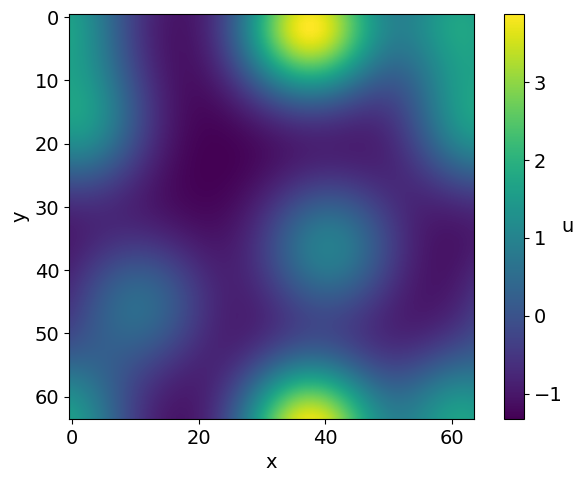

In [12]:
plt.imshow(X[0,0], interpolation="bilinear")
plt.tight_layout()
plt.xlabel("x")
plt.ylabel("y")
cb = plt.colorbar()
cb.set_label("u", rotation=0)
plt.savefig(f"../figures/example_ic.pdf", dpi=200, bbox_inches="tight")